# 演示使用向量库 faiss 来检索。

https://www.xinpianchang.com/a12814093


https://haokan.baidu.com/v?pd=wisenatural&vid=5577726715250023515

https://cloud.tencent.com/developer/article/2328915

faiss == Facebook AI Similarity Search，快速进行高维向量的相似性搜索。

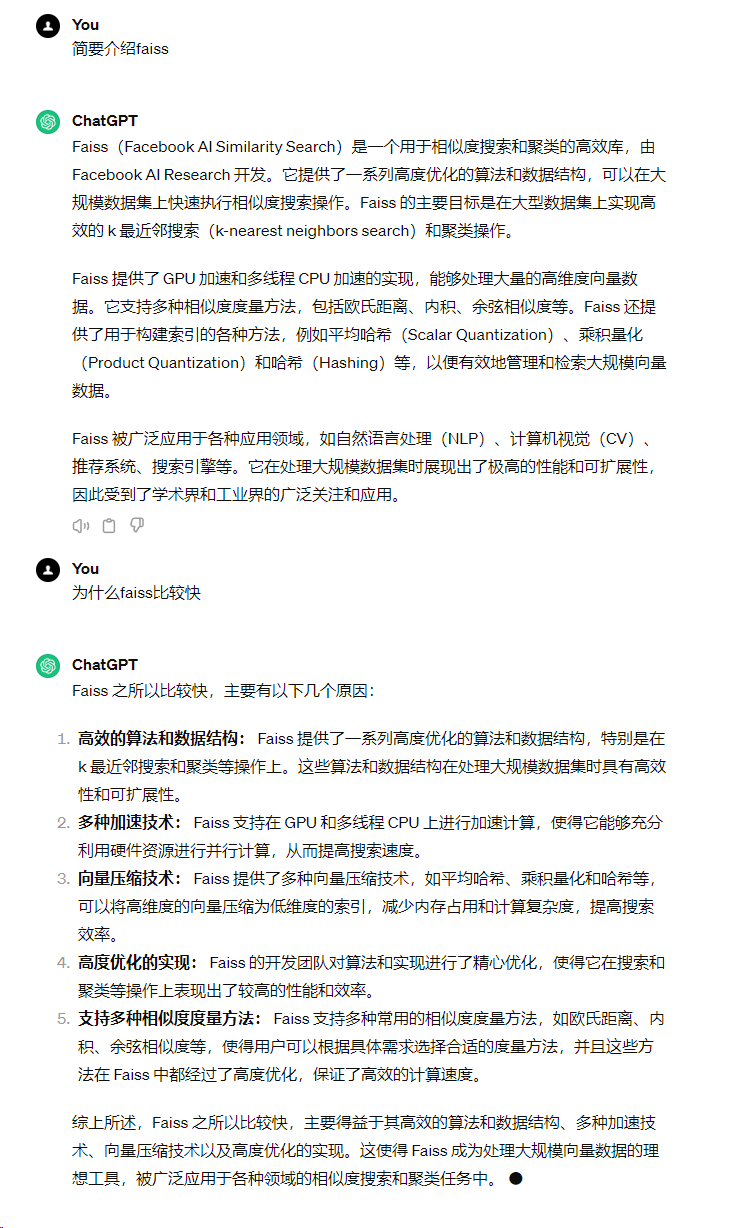

In [3]:
import os
import socket
import socks

socks.set_default_proxy(socks.SOCKS5, "127.0.0.1", 10808)
socket.socket = socks.socksocket

In [4]:
# 用openai 获取嵌入
from openai import OpenAI
client = OpenAI()
def get_embedding(text, model="text-embedding-3-small"): 
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [8]:
import csv
import numpy as np
import faiss

# 读取 CSV 文件，提取商品名称和嵌入向量
def read_csv(file_path):
    product_names = []
    embeddings = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # 跳过标题行
        for row in csvreader:
            product_names.append(row[0])
            embeddings.append(np.array(eval(row[1])))  # 使用 eval() 函数将字符串转换为列表
    return product_names, np.array(embeddings)

# 存储向量到 Faiss 索引
def build_index(embeddings):
    index = faiss.IndexFlatL2(embeddings.shape[1])  # 使用 L2 距离构建 Flat 索引
    index.add(embeddings)
    return index

# 在 Faiss 索引中检索最近邻
def search_index(index, query_embedding, k=5):
    distances, indices = index.search(np.array([query_embedding]), k)
    return distances[0], indices[0]

# 读取 CSV 文件并构建 Faiss 索引
def build_and_search_index(csv_file, query_embedding):
    product_names, embeddings = read_csv(csv_file)
    index = build_index(embeddings)
    distances, indices = search_index(index, query_embedding)
    return product_names, distances, indices

# 示例1
csv_file = "data/data_em.csv"
query_embedding = get_embedding('自然小清新背包')
product_names, distances, indices = build_and_search_index(csv_file, query_embedding)

print("Top 5 nearest products:")
for distance, index in zip(distances, indices):
    print(f"Product: {product_names[index]}, Distance: {distance:.4f}")

# 示例2
query_embedding = get_embedding('智能大屏手机')
product_names, distances, indices = build_and_search_index(csv_file, query_embedding)

print("Top 5 nearest products:")
for distance, index in zip(distances, indices):
    print(f"Product: {product_names[index]}, Distance: {distance:.4f}")



Top 5 nearest products:
Product: 限时特惠！清爽草编手提包, Distance: 0.7645
Product: 限时折扣！清爽草编手提包, Distance: 0.7719
Product: 优雅女神范！简约手提包, Distance: 0.7876
Product: 轻松出游，时尚百搭小包包, Distance: 0.7964
Product: 气质女神必备！简约百搭手提包, Distance: 0.8725
Top 5 nearest products:
Product: 【限时抢购】华为P30 Pro全面屏智能手机, Distance: 0.8426
Product: 【疯狂秒杀】三星Galaxy S10+智能手机, Distance: 0.9010
Product: 【清仓特价】华为Mate 20 Pro智能手机, Distance: 0.9060
Product: 【超值推荐】三星Galaxy Note 10+智能手机, Distance: 0.9090
Product: 【新品预售】三星Galaxy Fold折叠屏手机, Distance: 0.9462
